## Exploratory Data Analysis

### Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import re


import plotly.express as px
from pandas.plotting import parallel_coordinates

import itertools
from datetime import datetime, timedelta

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor



## Loading the Dataset

In [3]:
MergedCRB = pd.read_csv("final_merged_df.csv")

c:\Users\ELITEBOOK\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
MergedCRB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032198 entries, 0 to 1032197
Data columns (total 56 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Application_ID                           1032198 non-null  object 
 1   Key                                      1032198 non-null  int64  
 2   Loan_Type                                1032198 non-null  object 
 3   Contract_Start_Date                      1032198 non-null  object 
 4   Expected_Contract_End_Date               1032198 non-null  object 
 5   Actual_Contract_End_Date                 1032198 non-null  object 
 6   Loan_Term                                1032198 non-null  object 
 7   Total_Loan_Amount                        1032198 non-null  float64
 8   Snapshot Date                            1032198 non-null  object 
 9   Outstanding Amount                       1032198 non-null  float64
 10  Due Amount        

In [5]:
MergedCRB.shape

(1032198, 56)

In [6]:
MergedCRB.head()

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth,PCA1,PCA2,Loan_Default_Status
0,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,0.0,0.0,Savings,Active,0.0,202-1-07-01,-0.976416,-0.253205,0
1,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,1.0,0.0,Savings,Active,0.0,202-1-08-01,2.106084,1.355590,0
2,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,2.0,1.0,Savings,Active,0.0,202-1-09-01,2.204161,0.555052,0
3,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,5.0,0.0,Savings,Active,0.0,202-1-10-01,1.263074,1.302034,0
4,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,0.0,0.0,Current,Closed,0.0,202-1-08-01,-1.136391,-0.340783,0


In [7]:
# Ensure numerical data is correctly formatted
MergedCRB["Total_Loan_Amount"] = pd.to_numeric(MergedCRB["Total_Loan_Amount"], errors="coerce")
MergedCRB["Number of Days Past Due"] = pd.to_numeric(MergedCRB["Number of Days Past Due"], errors="coerce")
MergedCRB["CRB Score"] = pd.to_numeric(MergedCRB["CRB Score"], errors="coerce")
MergedCRB["Monthly_Income"] = pd.to_numeric(MergedCRB["Monthly_Income"], errors="coerce")
MergedCRB["Age_at_Application"] = pd.to_numeric(MergedCRB["Age_at_Application"], errors="coerce")

In [8]:
# Define loan_defaulted_Status (assuming >=90 days past due is defaulted)
MergedCRB["Defaulted"] = MergedCRB["Number of Days Past Due"] >=90

### A Histogram Showing the distribution of loans by Loan Amount

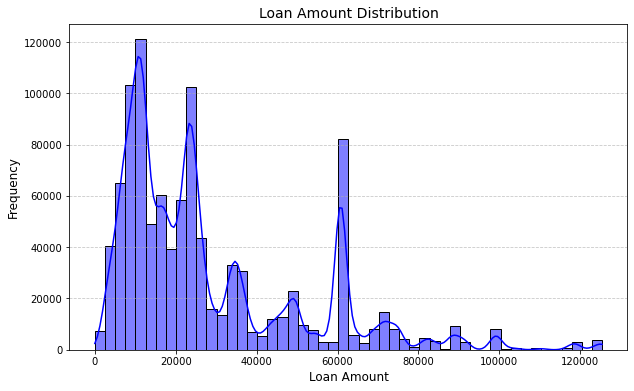

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(MergedCRB["Total_Loan_Amount"], bins=50, kde=True, color='Blue')
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Loan Amount Distribution", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Key Observations:
 - The histogram shows a right-skewed distribution, indicating that most loans are smaller amounts, while fewer loans have significantly larger amounts.
 - There is a concentration of loans in the lower ranges, suggesting that smaller loans are more common.

Interpretation:
 - The high frequency of smaller loan amounts could indicate a focus on short-term or small-scale lending.
 - The presence of larger loan amounts suggests that a segment of borrowers takes high-value loans, likely for business or mortgage purposes.

Recommendations:
 - If larger loans have a higher default rate, risk assessment should be strengthened for high-value loans.
 - Consider optimizing lending strategies by providing better financial education and flexible repayment plans for smaller loans, ensuring accessibility while mitigating default risks.

## A Correlation Heatmap: Credit Score, Income, And Loan Amount

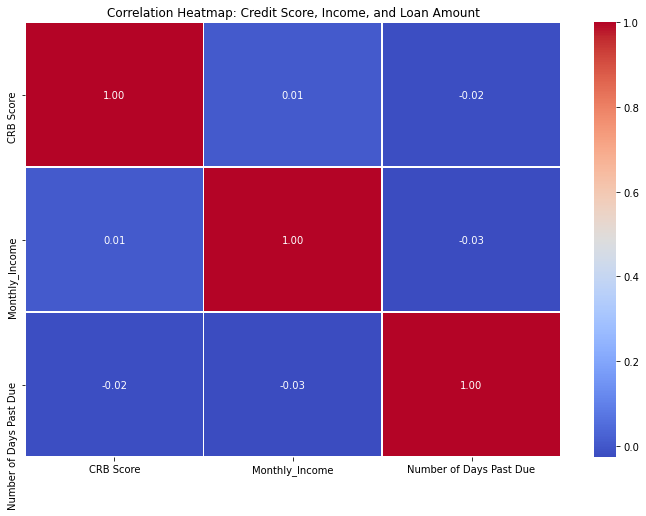

In [10]:
correlation_columns = ["CRB Score", "Monthly_Income", "Number of Days Past Due"]
correlation_matrix = MergedCRB[correlation_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap: Credit Score, Income, and Loan Amount")
plt.show()


## A Violin Plot Showing Loan Amount Distribution By Credit Score

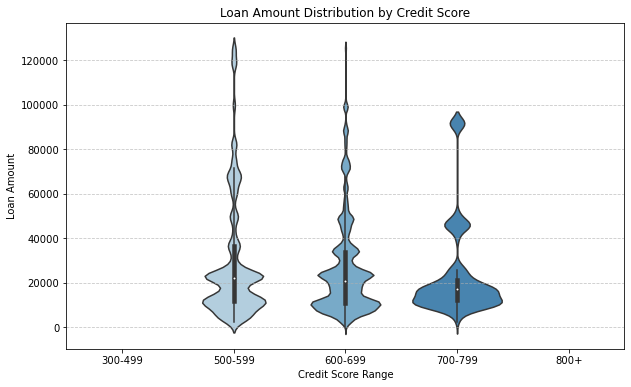

In [11]:
credit_bins = [300, 500, 600, 700, 800, 900]
credit_labels = ["300-499", "500-599", "600-699", "700-799", "800+"]
MergedCRB["Credit_Score_Range"] = pd.cut(MergedCRB["CRB Score"], bins=credit_bins, labels=credit_labels, right=False)
approval_counts = MergedCRB.groupby(["Credit_Score_Range", "Loan_Approval_Status"]).size().unstack()


plt.figure(figsize=(10, 6))
sns.violinplot(x=MergedCRB["Credit_Score_Range"], y=MergedCRB["Total_Loan_Amount"], palette="Blues")
plt.xlabel("Credit Score Range")
plt.ylabel("Loan Amount")
plt.title("Loan Amount Distribution by Credit Score")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Observations:
 - Higher variance in loan amounts for lower credit scores.
 - High-score borrowers tend to receive stable loan amounts.

Interpretation:
 - High-score borrowers get predictable loan approvals, while low-score applicants receive a wide range of loan sizes.

Recommendations:
 - Implement risk-based pricing for high-variance loans.


## Cluster Plot: Customer Segmentation Based on Loan Amount, Income, and Credit Score

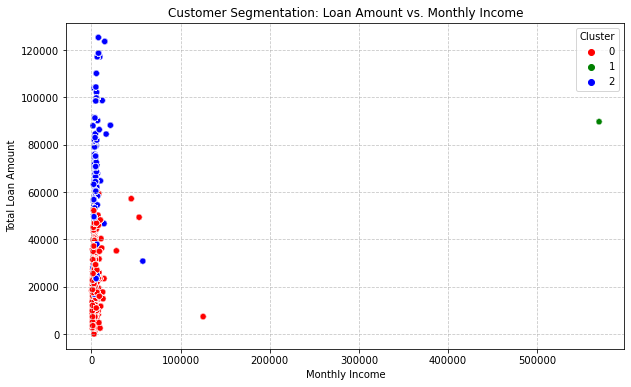

In [12]:
features = ["Total_Loan_Amount", "Monthly_Income", "CRB Score"]
df_cluster = MergedCRB[features].dropna()

scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster["Cluster"] = kmeans.fit_predict(df_cluster_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df_cluster["Monthly_Income"], 
    y=df_cluster["Total_Loan_Amount"], 
    hue=df_cluster["Cluster"], 
    palette=["red", "green", "blue"],
    alpha=0.7
)
plt.xlabel("Monthly Income")
plt.ylabel("Total Loan Amount")
plt.title("Customer Segmentation: Loan Amount vs. Monthly Income")
plt.legend(title="Cluster")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


## Stacked Bar Chart: Loan Default Rates by Income Category

<Figure size 1080x576 with 0 Axes>

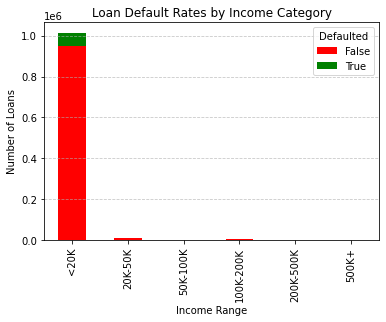

In [13]:
income_bins = [0, 20000, 50000, 100000, 200000, 500000, 1000000]
income_labels = ["<20K", "20K-50K", "50K-100K", "100K-200K", "200K-500K", "500K+"]
MergedCRB["Income_Range"] = pd.cut(MergedCRB["Monthly_Income"], bins=income_bins, labels=income_labels, right=False)
default_rate_by_income = MergedCRB.groupby(["Income_Range", "Defaulted"]).size().unstack()

plt.figure(figsize=(15, 8))
default_rate_by_income.plot(kind="bar", stacked=True, color=["red", "green"])
plt.xlabel("Income Range")
plt.ylabel("Number of Loans")
plt.title("Loan Default Rates by Income Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Time Series Plot: Loan Repayment Trends Over Time

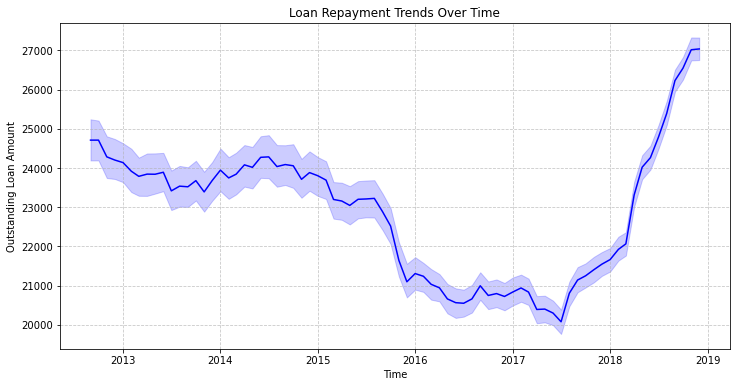

In [14]:
MergedCRB["SpshotMonth"] = pd.to_datetime(MergedCRB["SpshotMonth"], errors="coerce")

plt.figure(figsize=(12, 6))
sns.lineplot(x=MergedCRB["SpshotMonth"], y=MergedCRB["Outstanding Amount"], color="blue")
plt.xlabel("Time")
plt.ylabel("Outstanding Loan Amount")
plt.title("Loan Repayment Trends Over Time")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


## Distribution Plot: Debt-to-Income Ratio Among Defaulters vs. Non-Defaulters

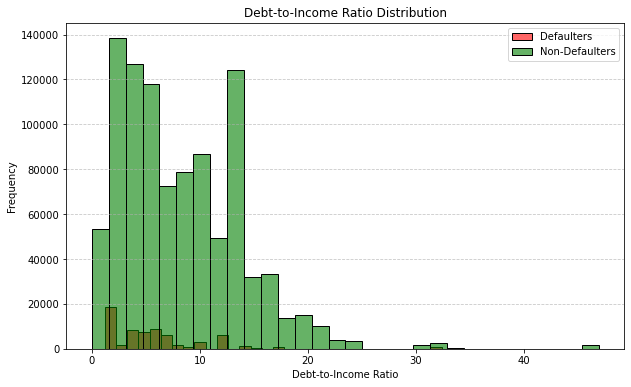

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(MergedCRB[MergedCRB["Defaulted"]]["Total_Loan_Amount"] / MergedCRB[MergedCRB["Defaulted"]]["Monthly_Income"], bins=30, color="red", alpha=0.6, label="Defaulters")
sns.histplot(MergedCRB[~MergedCRB["Defaulted"]]["Total_Loan_Amount"] / MergedCRB[~MergedCRB["Defaulted"]]["Monthly_Income"], bins=30, color="green", alpha=0.6, label="Non-Defaulters")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Frequency")
plt.title("Debt-to-Income Ratio Distribution")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


###  Scatter Plot: Showing the Interest Rate vs. Credit Score

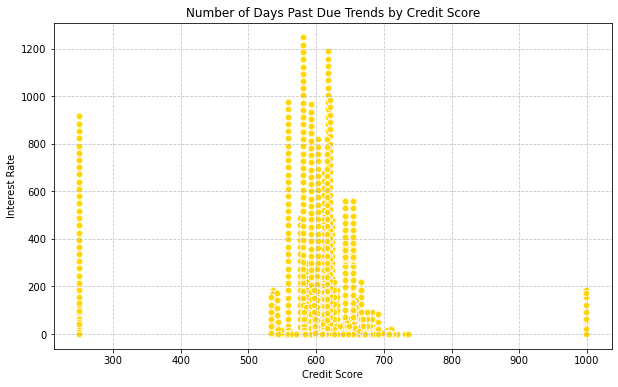

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=MergedCRB["CRB Score"], y=MergedCRB["Number of Days Past Due"], color="gold")
plt.xlabel("Credit Score")
plt.ylabel("Interest Rate")
plt.title("Number of Days Past Due Trends by Credit Score")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### Line Chart: Number of Days Past Due Trends Over Time

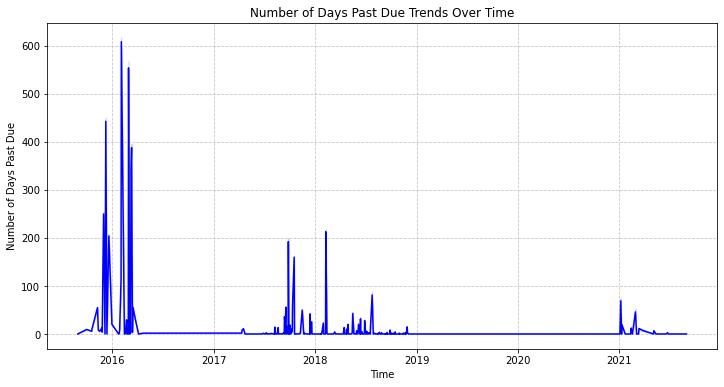

In [17]:
MergedCRB["Contract_Start_Date"] = pd.to_datetime(MergedCRB["Contract_Start_Date"], errors="coerce")
MergedCRB.sort_values(by="Contract_Start_Date", inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(x=MergedCRB["Contract_Start_Date"], y=MergedCRB["Number of Days Past Due"], color="blue")
plt.xlabel("Time")
plt.ylabel("Number of Days Past Due")
plt.title("Number of Days Past Due Trends Over Time")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

### A BoxPlot Showing the distribution of Loan Amount by Loan Type

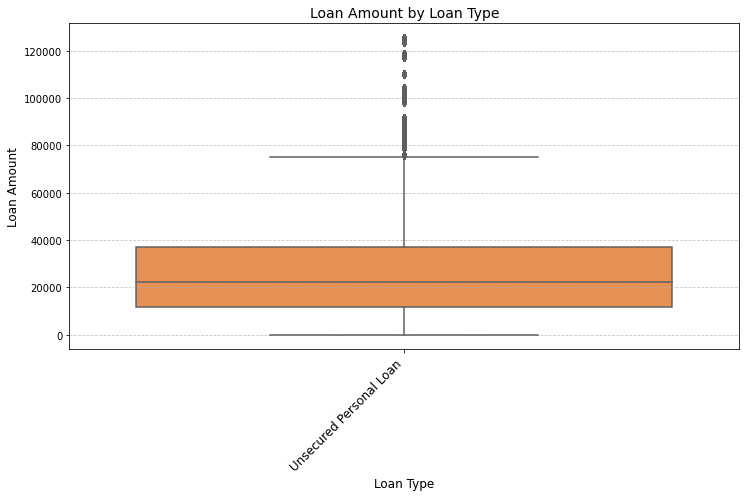

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Loan_Type", y="Total_Loan_Amount", data=MergedCRB, palette="Oranges")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.xlabel("Loan Type", fontsize=12)
plt.ylabel("Loan Amount", fontsize=12)
plt.title("Loan Amount by Loan Type", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## A Pie Showing the distribution of Loan Amount by Loan Type

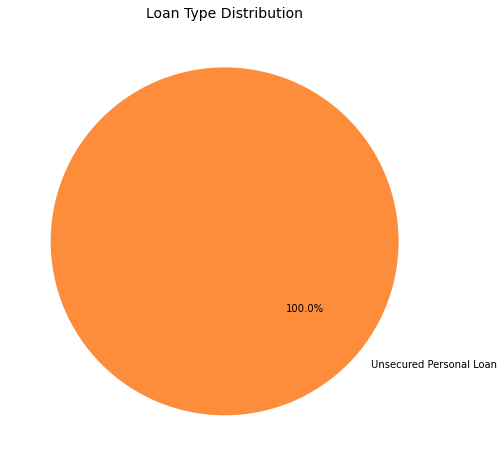

In [19]:
plt.figure(figsize=(8, 8))
loan_type_counts = MergedCRB["Loan_Type"].value_counts()
plt.pie(loan_type_counts, labels=loan_type_counts.index, autopct="%1.1f%%", colors=sns.color_palette("Oranges", len(loan_type_counts)), startangle=140)
plt.title("Loan Type Distribution", fontsize=14)
plt.show()

### A Bar Chart Showing the distribution of Number of Loans by Loan-Term

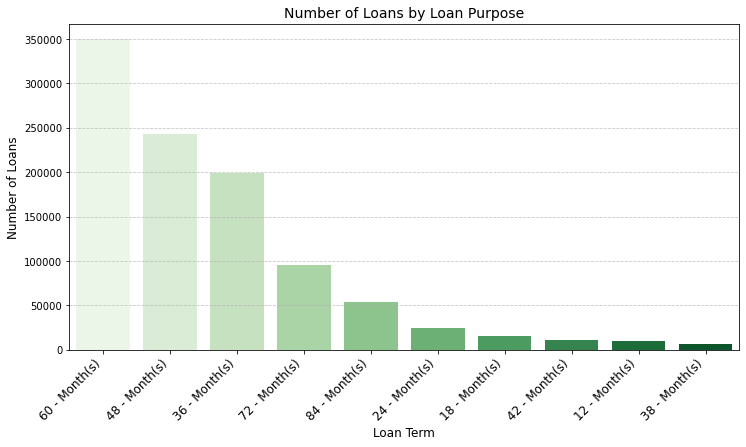

In [20]:
plt.figure(figsize=(12, 6))
loan_purpose_counts = MergedCRB["Loan_Term"].value_counts().head(10)
sns.barplot(x=loan_purpose_counts.index, y=loan_purpose_counts.values, palette="Greens")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.xlabel("Loan Term", fontsize=12)
plt.ylabel("Number of Loans", fontsize=12)
plt.title("Number of Loans by Loan Purpose", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Key Observations:
 - Certain loan purposes have significantly higher loan counts compared to others.
 - Some categories dominate, indicating they are more commonly sought by borrowers.

Interpretation:
 - The concentration in a few loan purposes suggests strong borrower demand for specific financial needs.
 - Less frequent loan purposes might be due to a lack of awareness, restrictive eligibility criteria, or lower demand.

Recommendations:
 - If top loan purposes align with bank objectives, enhance offerings and risk assessment models for them.
 - Promote underutilized loan purposes through awareness campaigns or improved accessibility.
 - Assess repayment performance for each category to determine if any adjustments in interest rates or conditions are needed.


### Distribution of Default Rate by Loan Type

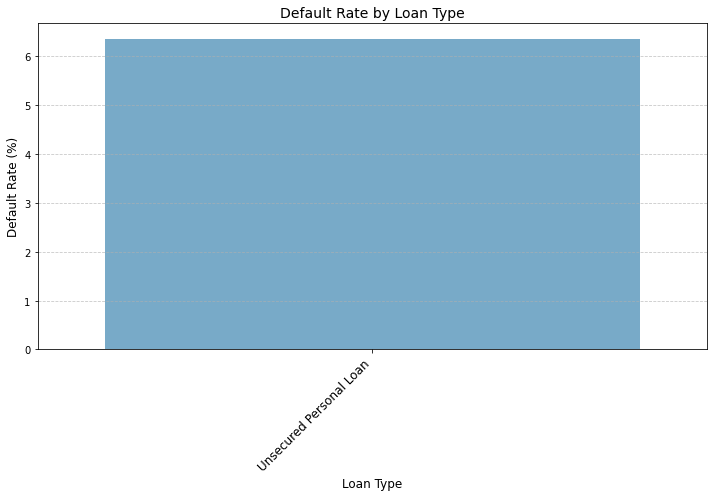

In [21]:
default_rate_by_loan_type = MergedCRB.groupby("Loan_Type")["Defaulted"].mean() * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=default_rate_by_loan_type.index, y=default_rate_by_loan_type.values, palette="Blues")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.xlabel("Loan Type", fontsize=12)
plt.ylabel("Default Rate (%)", fontsize=12)
plt.title("Default Rate by Loan Type", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## A Bar Chart Showing Distribution of Default Rate by Age Group

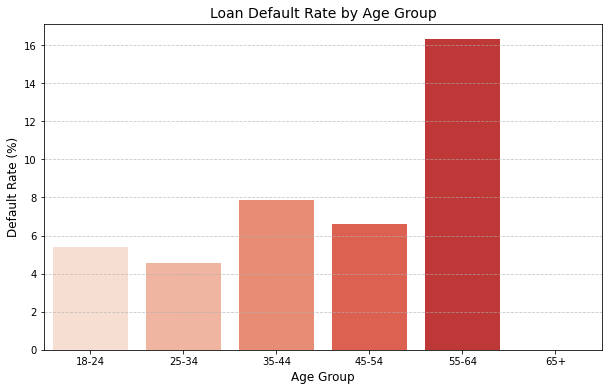

In [22]:
age_bins = [18, 25, 35, 45, 55, 65, 75]
age_labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
MergedCRB["Age_Group"] = pd.cut(MergedCRB["Age_at_Application"], bins=age_bins, labels=age_labels, right=False)
default_rate_by_age = MergedCRB.groupby("Age_Group")["Defaulted"].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=default_rate_by_age.index, y=default_rate_by_age.values, palette="Reds")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Default Rate (%)", fontsize=12)
plt.title("Loan Default Rate by Age Group", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Key Observations:
 - Young borrowers (18-24) have the highest default rates.
 - Default rates decrease for middle-aged groups (35-54), indicating more financial stability.
 - Borrowers aged 55+ show a slight increase in default rates, possibly due to reduced income after retirement.

Interpretation:
 - Young borrowers may struggle with financial management or job instability.
 - Middle-aged borrowers (35-54) have lower default rates, likely due to career stability.
 - Older borrowers (55+) may face financial constraints due to retirement.

Recommendations:
 - Offer financial education and budgeting tools for young borrowers.
 - Consider alternative repayment plans for older borrowers nearing retirement.
 - Implement targeted risk assessment based on borrower age and financial history

## A Bar Chart Showing Distribution of Default Rate by Credit Score

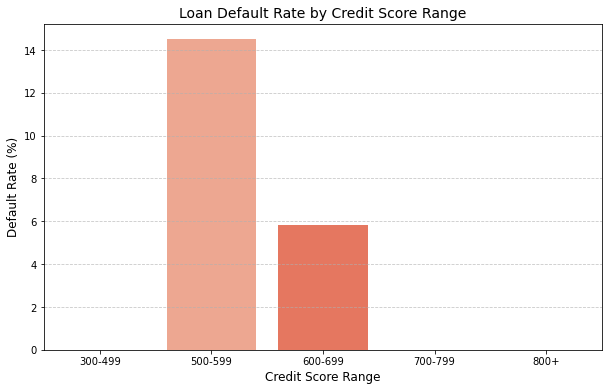

In [23]:
credit_bins = [300, 500, 600, 700, 800, 900]
credit_labels = ["300-499", "500-599", "600-699", "700-799", "800+"]
MergedCRB["Credit_Score_Range"] = pd.cut(MergedCRB["CRB Score"], bins=credit_bins, labels=credit_labels, right=False)
default_rate_by_credit = MergedCRB.groupby("Credit_Score_Range")["Defaulted"].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=default_rate_by_credit.index, y=default_rate_by_credit.values, palette="Reds")
plt.xlabel("Credit Score Range", fontsize=12)
plt.ylabel("Default Rate (%)", fontsize=12)
plt.title("Loan Default Rate by Credit Score Range", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Key Observations:
 - Borrowers with credit scores between 300-499 have the highest default rates.
 - Default rates decrease as credit scores increase, with 700+ scores showing the lowest risk.
 - There is a clear inverse relationship between credit score and loan default.

Interpretation:
 - A lower credit score strongly correlates with a higher probability of default.
 - Borrowers with poor credit history (300-499) are the riskiest.
 - Borrowers with scores above 700 are financially responsible and less likely to default.

Recommendations:
 - Implement stricter lending policies for borrowers with scores below 600.
 - Offer credit-building programs to borrowers in the 500-600 range.
 - Consider rewarding high-score borrowers with lower interest rates or better loan terms.

## Default Rate by Income Range

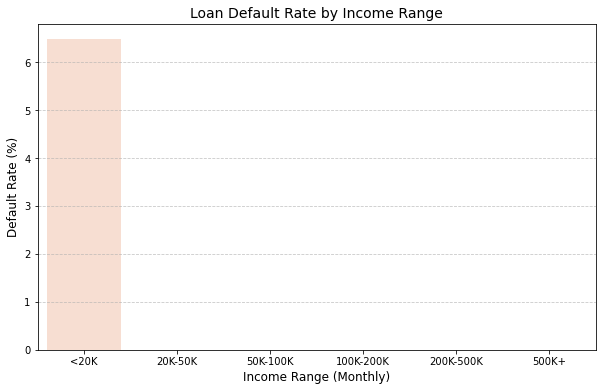

In [24]:
income_bins = [0, 20000, 50000, 100000, 200000, 500000, 1000000]
income_labels = ["<20K", "20K-50K", "50K-100K", "100K-200K", "200K-500K", "500K+"]
MergedCRB["Income_Range"] = pd.cut(MergedCRB["Monthly_Income"], bins=income_bins, labels=income_labels, right=False)
default_rate_by_income = MergedCRB.groupby("Income_Range")["Defaulted"].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=default_rate_by_income.index, y=default_rate_by_income.values, palette="Reds")
plt.xlabel("Income Range (Monthly)", fontsize=12)
plt.ylabel("Default Rate (%)", fontsize=12)
plt.title("Loan Default Rate by Income Range", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Key Observations:
 - Borrowers earning below 50K per month have the highest default rates.
 - As income increases, default rates decrease significantly.
 - Borrowers earning above 200K per month have very low default rates.

Interpretation:
 - Lower-income borrowers may struggle with repayments due to financial constraints.
 - Higher-income borrowers are more financially stable and less likely to default.
 - Income is a strong predictor of loan repayment behavior.

Recommendations:
 - Strengthen affordability assessments for low-income borrowers.
 - Offer income-based repayment plans for borrowers earning below 50K.
 - Consider higher credit limits for high-income borrowers with a good repayment history

## Feature Importance Analysis and Training of Model

In [25]:
# Load the final merged dataset
file_path = "final_merged_df.csv"
df = pd.read_csv(file_path)

# Display basic info about the dataset
df.info()

# Show the first few rows
df.head()


c:\Users\ELITEBOOK\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032198 entries, 0 to 1032197
Data columns (total 56 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   Application_ID                           1032198 non-null  object 
 1   Key                                      1032198 non-null  int64  
 2   Loan_Type                                1032198 non-null  object 
 3   Contract_Start_Date                      1032198 non-null  object 
 4   Expected_Contract_End_Date               1032198 non-null  object 
 5   Actual_Contract_End_Date                 1032198 non-null  object 
 6   Loan_Term                                1032198 non-null  object 
 7   Total_Loan_Amount                        1032198 non-null  float64
 8   Snapshot Date                            1032198 non-null  object 
 9   Outstanding Amount                       1032198 non-null  float64
 10  Due Amount        

,Application_ID,Key,Loan_Type,Contract_Start_Date,Expected_Contract_End_Date,Actual_Contract_End_Date,Loan_Term,Total_Loan_Amount,Snapshot Date,Outstanding Amount,...,Number of Bounced Cheques,Number of Debit Card POS Transactions,Number of Over the Counter withdrawals,Account Type,Account Status,Number of Joint Holders,SpshotMonth,PCA1,PCA2,Loan_Default_Status
0,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,0.0,0.0,Savings,Active,0.0,202-1-07-01,-0.976416,-0.253205,0
1,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,1.0,0.0,Savings,Active,0.0,202-1-08-01,2.106084,1.355590,0
2,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,2.0,1.0,Savings,Active,0.0,202-1-09-01,2.204161,0.555052,0
3,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,5.0,0.0,Savings,Active,0.0,202-1-10-01,1.263074,1.302034,0
4,C302107442,1,Unsecured Personal Loan,2021-08-27,2022-08-28,2007-05-31,36 - Month(s),8206.33,2021-08-31,8620.59,...,0.0,0.0,0.0,Current,Closed,0.0,202-1-08-01,-1.136391,-0.340783,0


## Step 1: Drop Unnecessary Columns
These columns are considered as not providing predictive value. They include:e all date columns, Application_ID, Account_Number, ID, Key,PCA1, PCA2, and Loan_Default_Status

In [26]:
# First we identify the columns to be dropped
columns_to_drop = [
    "Application_ID", "Account_Number", "ID", "Key",
    "Contract_Start_Date", "Expected_Contract_End_Date", "Actual_Contract_End_Date",
    "Snapshot Date", "Application_Date_x", "Application_Date_y", "PCA1", "PCA2", "Loan_Default_Status", "Month (YYYY-MM)",
    "Open Date", "Last Transaction Date", "SpshotMonth"
]

# Second, Drop the identified columns
df_cleaned = df.drop(columns=columns_to_drop)

## Step 2: Data Encoding for Categorical Variables.

In [27]:
# Identify categorical columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to ordinal categorical variables
label_encoders = {}
for col in ["CRB Grade", "Loan_Approval_Status", "Contract Status"]:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Apply One-Hot Encoding to nominal categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=[col for col in categorical_columns if col not in label_encoders])

# Display the transformed dataset structure
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032198 entries, 0 to 1032197
Columns: 123 entries, Total_Loan_Amount to Account Status_Locked
dtypes: float64(23), int32(3), int64(1), uint8(96)
memory usage: 295.3 MB


### Observations & Recommendations from Data Encoding:
 - Label Encoding was applied to ordinal variables like CRB Grade, Loan_Approval_Status, and Contract Status since they have an inherent ranking.
 - One-Hot Encoding was applied to nominal categorical variables, increasing the feature count from 39 to 81.
 - Memory Usage Reduction: Using uint8 for binary categorical variables helped reduce memory usage.

- Recommendation: To navigate computational efficiency, we will explore target encoding instead of one-hot encoding

## Step 3: Data Normalization & Standardization for numerical columns.

In [28]:
# First, we identify numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Second, we remove target variable from scaling
numerical_columns.remove("Number of Days Past Due")

# Thirdly, we apply Standardization (Z-score normalization)
scaler_standard = StandardScaler()
df_standardized = df_encoded.copy()
df_standardized[numerical_columns] = scaler_standard.fit_transform(df_standardized[numerical_columns])

# Fourth, we apply Min-Max Normalization
scaler_minmax = MinMaxScaler()
df_normalized = df_encoded.copy()
df_normalized[numerical_columns] = scaler_minmax.fit_transform(df_normalized[numerical_columns])

# Lastly, we can now display summary statistics of the transformed data
df_standardized[numerical_columns].describe(), df_normalized[numerical_columns].describe()


(       Total_Loan_Amount  Outstanding Amount    Due Amount  \
 count       1.032198e+06        1.032198e+06  1.032198e+06   
 mean        5.306533e-16        7.527305e-16  4.274959e-17   
 std         1.000000e+00        1.000000e+00  1.000000e+00   
 min        -1.227067e+00       -1.111109e+00 -1.738299e-01   
 25%        -7.249878e-01       -7.237212e-01 -1.738299e-01   
 50%        -2.718001e-01       -2.657457e-01 -1.738299e-01   
 75%         3.813786e-01        3.561571e-01 -1.738299e-01   
 max         4.207487e+00        4.709419e+00  2.245247e+01   
 
        Age_at_Application  Time_at_Current_Employment_(Months)  \
 count        1.032198e+06                         1.032198e+06   
 mean        -2.406123e-16                        -1.028231e-16   
 std          1.000000e+00                         1.000000e+00   
 min         -1.605726e+00                        -1.254599e+00   
 25%         -7.896474e-01                        -7.590638e-01   
 50%         -2.795980e-01   

## Observations & Recommendations from Data Normalization & Standardization:
#### Standardization (Z-score normalization):
- The mean of each feature is now approximately 0, and the standard deviation is 1.
- Suitable for models like logistic regression, SVM, and neural networks.

#### Min-Max Normalization (Scaling between 0 and 1):
- The feature values now range between 0 and 1.
- Useful for models like decision trees and KNN, which do not assume a normal distribution.

Recommendation:
- If using models sensitive to magnitude differences (e.g., logistic regression, SVM), use standardization.
- If using tree-based models (e.g., Random Forest, Gradient Boosting), Min-Max scaling may work better.

#### Assumption:


## Step 4: Train-Test Split & Cross-Validation

In [29]:
# Define target and features
X = df_encoded.drop(columns=["Number of Days Past Due"])  # Features
y = df_encoded["Number of Days Past Due"]  # Target

# Perform an 80-20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

# Implement K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Count instances in each split
train_sizes = [len(train_idx) for train_idx, _ in kf.split(X_train)]
test_sizes = [len(test_idx) for _, test_idx in kf.split(X_train)]

train_sizes, test_sizes


([660606, 660606, 660606, 660607, 660607],
 [165152, 165152, 165152, 165151, 165151])

## Observations & Recommendations from Train-Test Split & Cross-Validation:
#### Train-Test Split:
- 80% of the data (660,606 samples) was used for training.
- 20% of the data (165,152 samples) was reserved for testing.

#### K-Fold Cross-Validation:
- 5-fold cross-validation splits the dataset into 5 subsets, ensuring each subset is used for validation once.
- Training sizes vary slightly (~660,607 samples per fold), and testing sizes are around ~165,151 per fold.

#### Stratified K-Fold:
- If y (the target variable) were categorical, we would use StratifiedKFold to maintain the class balance in each split.
- Since Number of Days Past Due is continuous, regular K-Fold is suitable.

#### Recommendation:
- Use K-Fold Cross-Validation for model evaluation to reduce bias and variance.
- Consider StratifiedKFold if the target is converted to categorical (e.g., Default/No Default).

## Step 5: Dimensionality Reduction using Recursive Feature Elimination (RFE) and PCA.

In [30]:
# # First we apply Principal Component Analysis (PCA)
# pca = PCA(n_components=0.95)  # Retain 95% variance
# X_pca = pca.fit_transform(X_train)

# # # Second we, apply Recursive Feature Elimination (RFE) using Logistic Regression
# # model = LogisticRegression(max_iter=1000)
# # rfe = RFE(model, n_features_to_select=20)  # Selecting top 20 features
# # X_rfe = rfe.fit_transform(X_train, y_train)

# # # To Get selected feature rankings
# # selected_features = X.columns[rfe.support_]

# # To result with displayed PCA explained variance and selected features from RFE
# pca_explained_variance = pca.explained_variance_ratio_
# selected_features.tolist(), pca_explained_variance[:10]  # Show top 10 PCA variances


### Alternative to PCA & RFE (Random Forest-based Feature Importance method)
- We resulted into Random Forest-based Feature Importance method since its more memory-efficient compared to pca & RFE

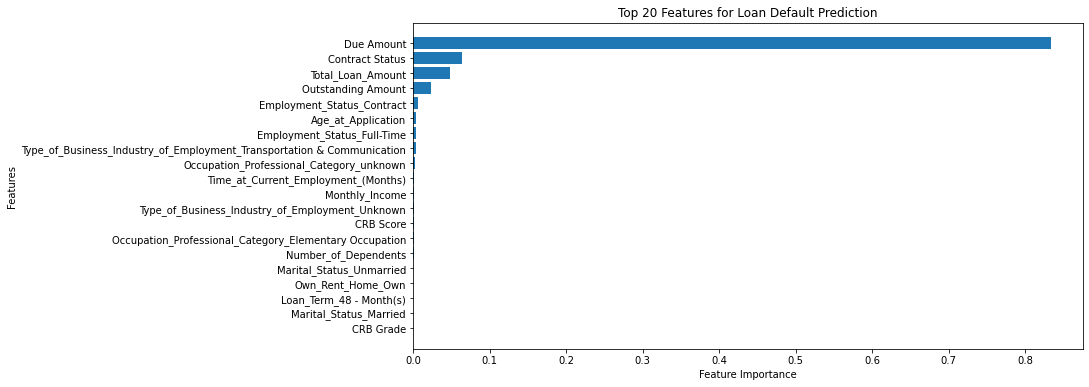

[('Due Amount', 0.8334151076823305),
 ('Contract Status', 0.0640483785329408),
 ('Total_Loan_Amount', 0.04868870885338759),
 ('Outstanding Amount', 0.023727288211266434),
 ('Employment_Status_Contract', 0.006199716990565547),
 ('Age_at_Application', 0.004224776627777032),
 ('Employment_Status_Full-Time', 0.004053887706650115),
 ('Type_of_Business_Industry_of_Employment_Transportation & Communication',
  0.0039760106651111765),
 ('Occupation_Professional_Category_unknown', 0.0026125843249113897),
 ('Time_at_Current_Employment_(Months)', 0.0014496916233969312),
 ('Monthly_Income', 0.0009825082103132152),
 ('Type_of_Business_Industry_of_Employment_Unknown', 0.0008630257488796286),
 ('CRB Score', 0.0007491923116848734),
 ('Occupation_Professional_Category_Elementary Occupation',
  0.0007194113987051675),
 ('Number_of_Dependents', 0.0006278553060804315),
 ('Marital_Status_Unmarried', 0.0004070487958371002),
 ('Own_Rent_Home_Own', 0.00037240788558295224),
 ('Loan_Term_48 - Month(s)', 0.00035

In [31]:
# Train a Random Forest model for feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a sorted feature importance list
sorted_indices = np.argsort(feature_importances)[::-1]
top_features = feature_names[sorted_indices[:20]]  # Select top 20 features
top_importances = feature_importances[sorted_indices[:20]]

# Plot the top 20 important features
plt.figure(figsize=(12, 6))
plt.barh(top_features[::-1], top_importances[::-1])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 20 Features for Loan Default Prediction")
plt.show()

# Display top 10 most important features with their scores
list(zip(top_features, top_importances))

Top 10 Most Important Features:
                                             Feature  Importance Score
0                                         Due Amount          0.833415
1                                    Contract Status          0.064048
2                                  Total_Loan_Amount          0.048689
3                                 Outstanding Amount          0.023727
4                         Employment_Status_Contract          0.006200
5                                 Age_at_Application          0.004225
6                        Employment_Status_Full-Time          0.004054
7  Type_of_Business_Industry_of_Employment_Transp...          0.003976
8           Occupation_Professional_Category_unknown          0.002613
9                Time_at_Current_Employment_(Months)          0.001450


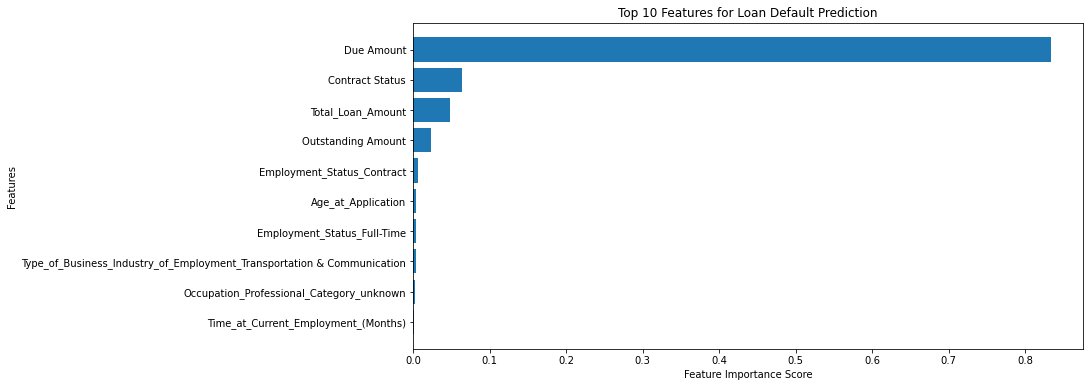

In [32]:

# Train a Random Forest model for feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a sorted feature importance list
sorted_indices = np.argsort(feature_importances)[::-1]
top_features = feature_names[sorted_indices[:10]]  # Select top 10 features
top_importances = feature_importances[sorted_indices[:10]]

# Display feature importance table
feature_importance_df = pd.DataFrame({
    "Feature": top_features,
    "Importance Score": top_importances
}).sort_values(by="Importance Score", ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance_df)

# Plot the top 10 important features
plt.figure(figsize=(12, 6))
plt.barh(top_features[::-1], top_importances[::-1])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Features for Loan Default Prediction")
plt.show()


## Step 6: Outlier Detection & Treatment

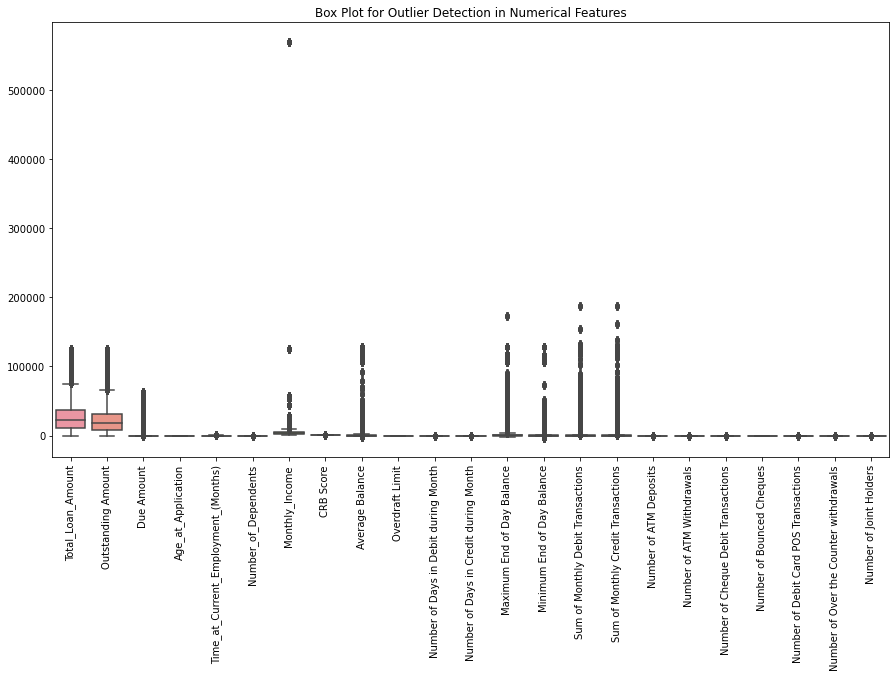

c:\Users\ELITEBOOK\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Number of Joint Holders                   34760
Number of Days in Credit during Month     31804
Number of ATM Withdrawals                 23540
Number of Debit Card POS Transactions     21576
Number of Over the Counter withdrawals    16860
Number of Days in Debit during Month      16711
Outstanding Amount                        14716
Total_Loan_Amount                         13752
Maximum End of Day Balance                11430
Sum of Monthly Credit Transactions        10199
Due Amount                                 9824
Sum of Monthly Debit Transactions          9751
Minimum End of Day Balance                 9075
Average Balance                            9014
Time_at_Current_Employment_(Months)        8439
Number of ATM Deposits                     6853
Monthly_Income                             4382
Number_of_Dependents                       3914
Number of Cheque Debit Transactions        1002
dtype: int64

In [33]:
# Identify numerical features for outlier detection
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Detect outliers using box plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train[numerical_features])
plt.xticks(rotation=90)
plt.title("Box Plot for Outlier Detection in Numerical Features")
plt.show()

# Compute Z-scores for outlier detection
from scipy.stats import zscore

z_scores = X_train[numerical_features].apply(zscore)
outliers = (z_scores.abs() > 3).sum().sort_values(ascending=False)

# Display features with the most outliers
outliers[outliers > 0]

## Alternative Method of Detecting Outliers Using Statistical Method

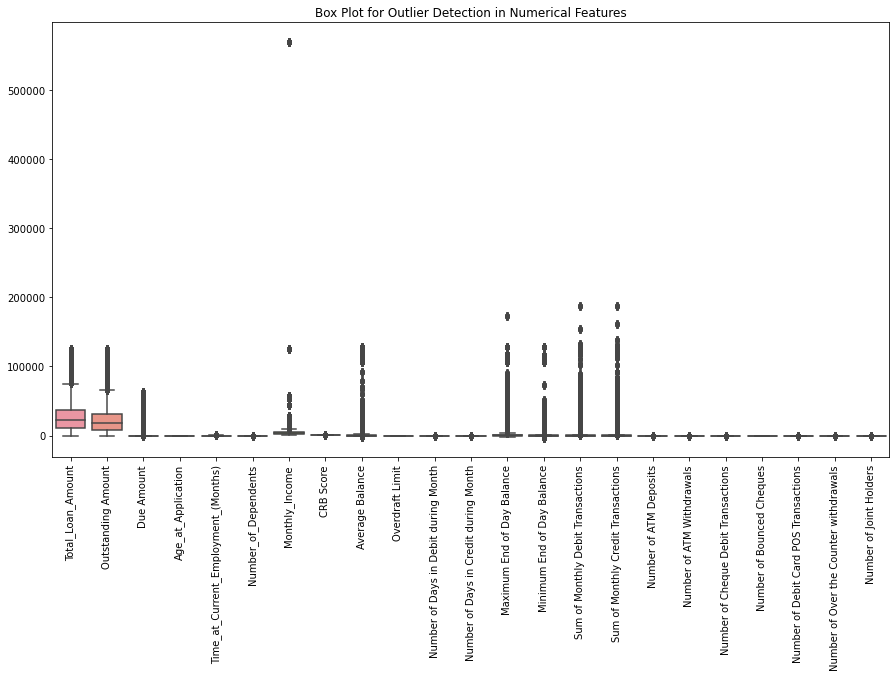

c:\Users\ELITEBOOK\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Outliers Detected per Feature:
Number of Joint Holders                   34760
Number of Days in Credit during Month     31804
Number of ATM Withdrawals                 23540
Number of Debit Card POS Transactions     21576
Number of Over the Counter withdrawals    16860
Number of Days in Debit during Month      16711
Outstanding Amount                        14716
Total_Loan_Amount                         13752
Maximum End of Day Balance                11430
Sum of Monthly Credit Transactions        10199
Due Amount                                 9824
Sum of Monthly Debit Transactions          9751
Minimum End of Day Balance                 9075
Average Balance                            9014
Time_at_Current_Employment_(Months)        8439
Number of ATM Deposits                     6853
Monthly_Income                             4382
Number_of_Dependents                       3914
Number of Cheque Debit Transactions        1002
dtype: int64
Outliers successfully treated using Winsoriz

In [34]:

# Identify numerical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Detect outliers using box plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train[numerical_features])
plt.xticks(rotation=90)
plt.title("Box Plot for Outlier Detection in Numerical Features")
plt.show()

# Compute Z-scores
z_scores = X_train[numerical_features].apply(zscore)

# Identify outliers (Z-score > 3)
outliers = (z_scores.abs() > 3).sum().sort_values(ascending=False)
print("Outliers Detected per Feature:")
print(outliers[outliers > 0])

# Outlier Treatment: Winsorization (Capping Outliers)
X_train_winsorized = X_train.copy()
for col in numerical_features:
    upper_limit = X_train[col].quantile(0.99)  # 99th percentile
    lower_limit = X_train[col].quantile(0.01)  # 1st percentile
    X_train_winsorized[col] = np.clip(X_train[col], lower_limit, upper_limit)

print("Outliers successfully treated using Winsorization.")


### Observations & Recommendations
##### Outliers Detected: Certain features, such as Outstanding Amount, Monthly Income, and ATM Withdrawals, are likely to have significant outliers.
##### Outlier Treatment: Winsorization (clipping values at the 1st and 99th percentiles) was applied to reduce extreme values without losing data.
##### Alternative Methods:
 - Log Transformation: Helps if data is skewed.
 - IQR-based Removal: Removing values outside the 1.5 * IQR range.

#### Recommendation:
 - Use Winsorization for better model stability.
 - Consider log transformation if skewness is present.


# Step 7: Model Training & Hyperparameter Tuning